# POlitical DIscourse Ontology Introduction

This research addresses the need for the systematic organization and integration of political discourse, regardless of the communication channels employed, whether rooted in social platforms or dissemination channels. The aim is to facilitate nuanced and advanced analyses that consider specific aspects of the political domain, including the persuasive nature of discourse, the ideological basis of the messages, the targeted audience (wether groups or comcommunities), and the temporal context of communication. The resulting ontology, named PODIO (POlitical DIscourse Ontology), offers a structured framework to enhance the understanding of political debate. It was successfully evaluated, confirming its error-free design and alignment with functional requirements. For validation, we integrated existing datasets in the Knowledge Graph from social media, news, and electoral programs, demonstrating the effectiveness of PODIO in representing diverse forms of political discourse.

The available resources are listed bellow:
- [The ontology github repository.](https://github.com/oeg-upm/PODIO)
- [The ontology and the documentation.](https://w3id.org/podio)
- [The Knowledge Graph.](https://w3id.org/podio/sparql)


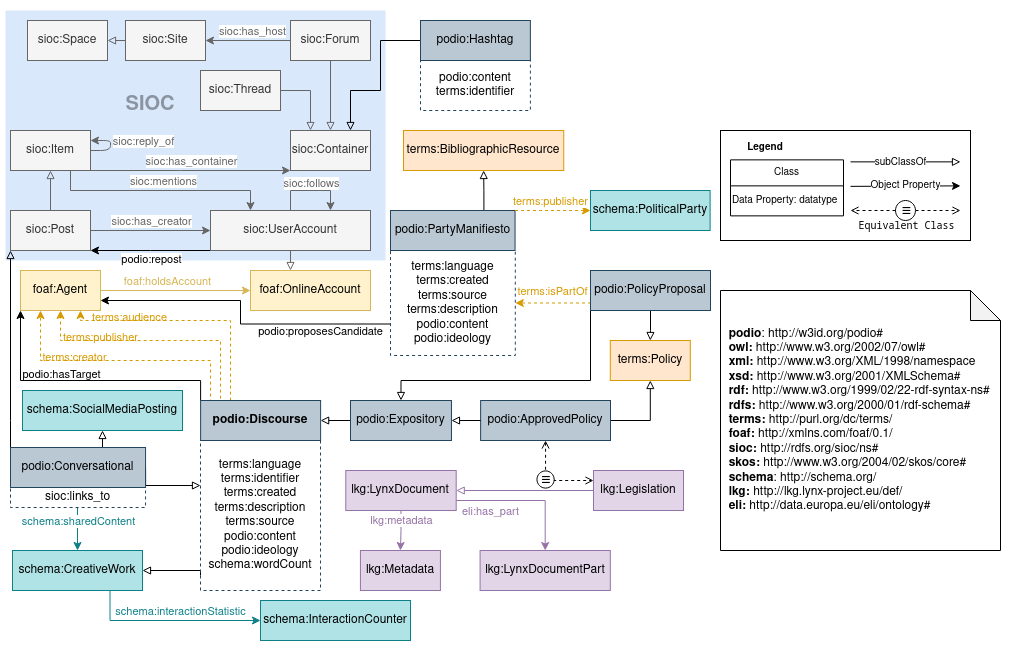

# PODIO Knowledge Graph

## Generating triples

You will need to install [yarrrml-parser](https://rml.io/yarrrml/tutorial/getting-started/) and download [rmlmapper-6.1.3](https://github.com/RMLio/rmlmapper-java/releases) to generate the RDF code and triples.

In [ ]:
# This is the procedure to be used to generate the different triples.

import os

## Path where rmlmapper is
script_path="/home/ibai/OEG/MadridElectoralTwitterScrapper/SeleniumTwitterScrapper/mapper/mapping_requirements"

def generate_triples(filename_mappings, verbose=False):
    ### Generate turtle file
    os.system(f"yarrrml-parser -i {filename_mappings}.yml -o {filename_mappings}.ttl")
    ### Generate triples
    if verbose:
        os.system(f"java -jar {script_path}/rmlmapper-6.1.3-r367-all.jar -v -m {filename_mappings}.ttl -o {filename_mappings}.nt")
    else:
        os.system(f"java -jar {script_path}/rmlmapper-6.1.3-r367-all.jar -m {filename_mappings}.ttl -o {filename_mappings}.nt")

    return "Triples Generated"

### Party Manifestos and Political Proposals

Among the datasets of party manifestos available online, the most relevant we have found are:

Description|Dataset
---|---
**USA elections party manifestos**| Woolley, J. T., Peters, G. & University Of California, S. B. (1999) The American Presidency Project. Santa Barbara, Calif.: University of California. [Web.] Retrieved from the Library of Congress, https://lccn.loc.gov/2005616760.
**USA States elections party manifestos** | Hopkins, Daniel J; Coffey, Daniel J; Galvin, Daniel J; Gamm, Gerald; Henderson, John; Paddock, Joel W.; Schickler, Eric, 2022, "Select American State Party Platforms, 1846-2017", https://doi.org/10.7910/DVN/KNOSHL, Harvard Dataverse, V1
**Scottish elections party manifestos** | Greene, Zachary; McMillan, Fraser, 2020, "Scottish Party Election Manifestos, 1999-2016", https://doi.org/10.7910/DVN/PH8XZO, Harvard Dataverse, V1
**German local elections party manifestos** | Gross, M., & Jankowski, M. (2019). Dimensions of political conflict and party positions in multi-level democracies: evidence from the Local Manifesto Project. In West European Politics (Vol. 43, Issue 1, pp. 74–101). Informa UK Limited. https://doi.org/10.1080/01402382.2019.1602816
**Spanish regional elections party manifestos** | Alonso, S., Gómez, B., & Cabeza, L. (2013). Measuring Centre–Periphery Preferences: The Regional Manifestos Project. In Regional &amp; Federal Studies (Vol. 23, Issue 2, pp. 189–211). Informa UK Limited. https://doi.org/10.1080/13597566.2012.754351
**European elections party manifestos** | Schmitt, Hermann, & Wüst, Andreas M. (2012). Euromanifestos Project (EMP) 1979 - 2004. GESIS Data Archive, Cologne. ZA4457 Data file Version 1.0.0, https://doi.org/10.4232/1.4457.


To meet the competency questions we will reuse USA elections party manifestos from 2020 and 2016. This implies that we will use the 2020 and 2016 Democratic party manifestos and the 2016 Republican party manifesto. This is because there is no new party platform for republican party in 2020 elections, they reuse the 2016 manifesto: [*"RESOLVED, That the 2020 Republican National Convention will adjourn without adopting a new platform until the 2024 Republican National Convention;"*](https://www.presidency.ucsb.edu/documents/resolution-regarding-the-republican-party-platform)

Party manifestos are replete of policy proposals such as the following: *Democrats will aggressively enforce non-discrimination protections in the Americans with Disabilities Act and other civil rights laws, especially when designing emergency management systems and new facilities and services in response to the pandemic. Democrats will prohibit unjustified segregation of patients with disabilities, and additionally prohibit rationing of health care that refuses or diverts hospitalization, treatment, or supplies based on a patient's disability. We recognize people with disabilities living in group homes and other care facilities are at greater risk of contracting COVID-19, and that people with disabilities may require additional resources to protect their health, well-being, and independence during the pandemic. We will improve oversight and expand protections for residents and staff at nursing homes, which have seen some of the worst COVID-19 outbreaks. And we will expand support for telemedicine, so Americans do not have to go without essential health care during the pandemic.*

Extracting the policy proposals with granularity and precision is a complicated task. Whereas in other party manifestos it is easier because the proposals are numbered, in the US elections manifestos this is not the case. In order to populate the KG, we decided to generalise and take every paragraph of the party manifesto as a policy proposal. 

In [ ]:
# Downloading the Manifestos, aggregate with metadata and save them as JSON
from bs4 import BeautifulSoup
import requests, json, os

## Set filenames (WITHOUT extension)
if not os.path.exists("data"): os.mkdir("data")
filename_manifestos= "data/manifestos"
filename_proposals= "data/proposals"

## Download the manifestos from the web and aggregate with extra data
manifestos= {}
pmanifestos= ["2020-democratic-party-platform", "2016-democratic-party-platform", "2016-republican-party-platform"]
for pmanifesto in pmanifestos:
    response = requests.get(f'https://www.presidency.ucsb.edu/documents/{pmanifesto}')
    assert(response.status_code==200)

    soup = BeautifulSoup(response.content, 'html.parser')
    content= soup.find('div', class_='field-docs-content').text
    manifestos[pmanifesto]= {"date": f"{pmanifesto.split('-')[0]}-1-1T00:00:00", 
                             "pparty_id": f'{pmanifesto.split("-")[1]}Party',
                             "source": f'https://www.presidency.ucsb.edu/documents/{pmanifesto}',
                             "language": "http://id.loc.gov/vocabulary/iso639-2/eng",
                             "content": content}

manifestos["2020-democratic-party-platform"]["pparty"]= "http://www.wikidata.org/entity/Q29552"
manifestos["2020-democratic-party-platform"]["ideology"]= "http://www.wikidata.org/entity/Q16152203"
manifestos["2020-democratic-party-platform"]["candidate"]= "http://www.wikidata.org/entity/Q6279"
manifestos["2020-democratic-party-platform"]["party_wikidata_id"]= "Q29552"
manifestos["2020-democratic-party-platform"]["candidate_wikidata_id"]= "Q6279"



manifestos["2016-democratic-party-platform"]["pparty"]= "http://www.wikidata.org/entity/Q29552"
manifestos["2016-democratic-party-platform"]["ideology"]= "http://www.wikidata.org/entity/Q16152203"
manifestos["2016-democratic-party-platform"]["candidate"]= "http://www.wikidata.org/entity/Q6294"
manifestos["2016-democratic-party-platform"]["party_wikidata_id"]= "Q29552"
manifestos["2016-democratic-party-platform"]["candidate_wikidata_id"]= "Q6294"


manifestos["2016-republican-party-platform"]["pparty"]= "http://www.wikidata.org/entity/Q29468"
manifestos["2016-republican-party-platform"]["ideology"]= "http://www.wikidata.org/entity/Q7169"
manifestos["2016-republican-party-platform"]["candidate"]= "http://www.wikidata.org/entity/Q22686"
manifestos["2016-republican-party-platform"]["party_wikidata_id"]= "Q29468"
manifestos["2016-republican-party-platform"]["candidate_wikidata_id"]= "Q22686"


manifestos["2020-republican-party-platform"]= manifestos["2016-republican-party-platform"].copy()
manifestos["2020-republican-party-platform"]["date"]= "2020-1-1T00:00:00"
pmanifestos.append("2020-republican-party-platform")

## Save manifestos data
with open(f"{filename_manifestos}.json", "w") as f:
    json.dump(manifestos, f)

## Extract policy proposals from manifestos
policy_proposals= []
for pmanifesto in pmanifestos:
    proposals= [x for x in manifestos[pmanifesto]["content"].split("\n") if x != ""]
    counter= 0
    for proposal in proposals:
        counter += 1
        if pmanifesto.split("-")[1] == "republican": 
            author= "http://www.wikidata.org/entity/Q29468"
            ideology= "http://www.wikidata.org/entity/Q7169"
        else: 
            author="http://www.wikidata.org/entity/Q29552"
            ideology= "http://www.wikidata.org/entity/Q16152203"
        proposal_json= {
            "id": counter,
            "date": f"{pmanifesto.split('-')[0]}-1-1T00:00:00", 
            "language": "http://id.loc.gov/vocabulary/iso639-2/eng",
            "content": proposal, 
            "source": f'https://www.presidency.ucsb.edu/documents/{pmanifesto}',
            "word_count": len(proposal.split()),
            "part_of": f'{pmanifesto.split("-")[1]}Party',
            "target": "http://www.wikidata.org/entity/Q846570",
            "ideology": ideology, 
            "creator": author,
            "publisher": author
        }
        policy_proposals.append(proposal_json)

## Save policy proposals data
with open(f"{filename_proposals}.json", "w") as f:
    json.dump(policy_proposals, f)

In [ ]:
# Generate the data mapping file to transform the above data into triples
import os

## Set filenames (WITHOUT extension)
filename_mappings= "mappings/mappings_manifestos"
if not os.path.exists("mappings"): os.mkdir("mappings")

## Generate mapping file according to the JSONs data
mapping= f"""
prefixes:
    #Core imports
    rdf: "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    rdfs: "http://www.w3.org/2000/01/rdf-schema#"
    xsd: "http://www.w3.org/2001/XMLSchema#"
    xml: "http://www.w3.org/XML/1998/namespace"
    #Vocabulary imports
    schema: "http://schema.org/"
    terms: "http://purl.org/dc/terms/"
    dc: "http://purl.org/dc/elements/1.1/"
    dcam: "http://purl.org/dc/dcam/"
    vann: "http://purl.org/vocab/vann/"
    skos: "http://www.w3.org/2004/02/skos/core#"
    #Ontology imports
    owl: "http://www.w3.org/2002/07/owl#"
    foaf: "http://xmlns.com/foaf/0.1/"
    sioc: "http://rdfs.org/sioc/ns#"
    lkg: "http://lkg.lynx-project.eu/def/"
    nif: "http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#"
    eli: "http://data.europa.eu/eli/ontology#"
    #Knowledge graph domain declaration
    podio: "http://w3id.org/podio#" # URL to ontoology

sources:
    manifestos_json: [{filename_manifestos}.json~jsonpath, "$.[*]"]
    proposals_json: [{filename_proposals}.json~jsonpath, "$.[*]"]

mappings:
    Manifestos:
        sources: 
          - manifestos_json
        s: podio:PartyManifesto/USA/$(pparty_id)/$(date)
        po:
          - [a, podio:PartyManifesto]
          - [terms:language, $(language)~iri]
          - [terms:created, $(date), xsd:dateTime]
          - [terms:source, $(source)~iri]
          - [terms:publisher, $(pparty)~iri]
          - [podio:content, $(content), xsd:string]
          - [podio:ideology, $(ideology)~iri]
          - [podio:proposesCandidate, $(candidate)~iri]

    Proposals:
        sources: 
          - proposals_json
        s: podio:PolicyProposal/USA/$(part_of)/$(date)/$(id)
        po:
          - [a, podio:PolicyProposal]
          - [terms:language, $(language)~iri]
          - [terms:created, $(date), xsd:dateTime]
          - [terms:source, $(source)~iri]
          - [terms:identifier, $(id), xsd:int]
          - [podio:ideology, $(ideology)~iri]
          - [podio:content, $(content), xsd:string]
          - [schema:wordCount, $(word_count)]
          - [terms:publisher, $(publisher)~iri]
          - [terms:creator, $(creator)~iri]
          - [podio:hasTarget, $(target)~iri]
          - [terms:isPartOf, podio:PartyManifesto/USA/$(part_of)/$(date)~iri]
    
    AgentCandidate:
        sources: 
          - manifestos_json
        s: $(candidate)
        po:
          - [a, foaf:Agent]
          - [terms:identifier, $(candidate_wikidata_id), xsd:string]
          - [rdfs:isDefinedBy, $(candidate)~iri]
        
    AgentParty:
        sources: 
          - manifestos_json
        s: $(pparty)
        po:
          - [a, foaf:Agent]
          - [terms:identifier, $(party_wikidata_id), xsd:string]
          - [rdfs:isDefinedBy, $(pparty)~iri]
"""

## Save mappings file
with open(f"{filename_mappings}.yml", "w") as f:
    f.write(mapping)
    
## Generate the triples
generate_triples(filename_mappings)

print("Political Party Manifestos Triples Generated")

### Social Media Posts

Among the datasets of political social media posts available online, the most relevant we have found are:

Social Media | Description | Dataset
--- | --- | ---
Facebook | **2019 Spanish General Elections Facebook Ads** | Baviera Puig, T. (2020). 2019 Spanish General Elections Facebook Ads Dataset. Universitat Politècnica de València. https://doi.org/10.4995/Dataset/10251/146502
Twitter | **Spanish political parties tweets** | https://www.kaggle.com/datasets/ricardomoya/tweets-poltica-espaa/data
Twitter | **Trump Tweets as of June 2020** | https://www.kaggle.com/datasets/austinreese/trump-tweets/data
Twitter | **Bidedn Tweets in 2019 and 2020** | https://www.kaggle.com/datasets/akashdusane/joe-biden-tweets-us-elections

To show the ability to work with different social networks we will include data from both Twitter and Facebook. In addition, we will include posts from two different countries to demonstrate that PODIO is able to correctly represent the international political discourse. This knowledge will be exploited with SPARQL queries.

As many datasets are from Kaggle, you need to install [kaggle](https://pypi.org/project/kaggle/) library and get a free API key, see the [kaggle documentation](https://www.kaggle.com/docs/api) for more information about this. 

In [ ]:
# Data set downloading
import kaggle
import requests
import os 

if not os.path.exists("data"): os.mkdir("data")

## https://www.kaggle.com/docs/api
kaggle.api.authenticate

## Spanish political parties tweets
kaggle.api.dataset_download_files('ricardomoya/tweets-poltica-espaa', path='data/', unzip=True)

## Trump Tweets as of June 2020
kaggle.api.dataset_download_files("austinreese/trump-tweets", path='data/', unzip=True)

## Bidedn Tweets in 2019 and 2020
kaggle.api.dataset_download_files("akashdusane/joe-biden-tweets-us-elections", path='data/', unzip=True)

## 2019 Spanish General Elections Facebook Ads
response = requests.get("https://riunet.upv.es/bitstream/handle/10251/146502/Facebook_Ads_2019_Spanish_General_Elections.csv?sequence=1&isAllowed=y")
open("data/facebook_ads.csv", "w").write(response.content.decode('utf-16'))


In [ ]:
# Data sets loading, cleaning, enriching and storage
import pandas as pd
from datetime import datetime
import re, json

## Set filenames (WITHOUT extension)
filename_all_data= "data/conversational"
filename_extra_data= "data/conversational_extra"
filename_metrics_data= "data/conversational_metrics"

## Limit to avoid overloading the graph database due to excessive volume of data sets.
limit=4000 #If you do not want limit set as None

## Dataset loading
df_spain_facebook_ads= pd.read_csv("data/facebook_ads.csv", sep=';', on_bad_lines='skip')[:limit]
df_spain_tweets= pd.read_csv("data/tweets_politica_kaggle.csv", sep='\t', on_bad_lines='skip')[:limit]
df_trump_tweets= pd.read_csv("data/realdonaldtrump.csv", sep=',', on_bad_lines='skip')[:limit]
df_biden_tweets= pd.read_csv("data/JoeBiden_Tweets_2019-20.csv", sep=',', on_bad_lines='skip')[:limit]

## Manual entity linking
wikidata_ideology= {"izquierdaunida": "http://www.wikidata.org/entity/Q121254",
                    "ciudadanos": "http://www.wikidata.org/entity/Q6216",
                    "psoe": "http://www.wikidata.org/entity/Q821102",
                    "partidopopular": "http://www.wikidata.org/entity/Q617609",
                    "pp": "http://www.wikidata.org/entity/Q617609",
                    "podemos": "http://www.wikidata.org/entity/Q275595",
                    "voxespaña": "http://www.wikidata.org/entity/Q948731",
                    "vox": "http://www.wikidata.org/entity/Q948731",
                    "realdonaldtrump": "http://www.wikidata.org/entity/Q31838499",
                    "joebiden": "http://www.wikidata.org/entity/Q16152203"}

wikidata_agent= {  "izquierdaunida": "http://www.wikidata.org/entity/Q623740",
                    "ciudadanos": "http://www.wikidata.org/entity/Q1393123",
                    "psoe": "http://www.wikidata.org/entity/Q138198",
                    "partidopopular": "http://www.wikidata.org/entity/Q185088",
                    "pp": "http://www.wikidata.org/entity/Q185088",
                    "podemos": "http://www.wikidata.org/entity/Q16059622",
                    "voxespaña": "http://www.wikidata.org/entity/Q15630787",
                    "vox": "http://www.wikidata.org/entity/Q15630787",
                    "realdonaldtrump": "http://www.wikidata.org/entity/Q22686",
                    "joebiden": "http://www.wikidata.org/entity/Q6279"}


## Regular expresion for extracting social media specific data
pattern_twitter_mentions= r'(?<=[^\w!])@(\w+)\b'
pattern_facebook_mentions = r'(?<=[^\w!])@([A-Z][a-z0-9]*\s?(?:[A-Z][a-z0-9]*)*)\b'
pattern_hashtag = r'(?!\s)#([A-Za-z]\w*)\b'
pattern_links= r'(?:http|ftp|https):\/\/(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])'

## Dataset specific operations: cleaning and enriching
df_spain_tweets.drop(['cuenta'], axis=1, inplace=True)
df_spain_tweets.rename(columns = {'timestamp':'date'}, inplace = True) 
df_spain_tweets.rename(columns = {'tweet':'content'}, inplace = True) 
df_spain_tweets.rename(columns = {'partido':'account'}, inplace = True) 
df_spain_tweets["account"]= [x.replace(" ","") for x in df_spain_tweets["account"]]
df_spain_tweets["date"]= [str(datetime.fromtimestamp(row).isoformat()) for row in df_spain_tweets["date"]]
df_spain_tweets["mentions"]= [re.findall(pattern_twitter_mentions, str(text), re.IGNORECASE) for text in df_spain_tweets["content"]]
df_spain_tweets["hashtags"]= [re.findall(pattern_hashtag, str(text), re.IGNORECASE) for text in df_spain_tweets["content"]]
df_spain_tweets["links"]= [re.findall(pattern_links, str(text), re.IGNORECASE) for text in df_spain_tweets["content"]]
df_spain_tweets["agent"]= [wikidata_agent[x.lower()] for x in df_spain_tweets["account"]]
df_spain_tweets["ideology"]= [wikidata_ideology[x.lower()] for x in df_spain_tweets["account"]]
df_spain_tweets["media"]=["Twitter" for x in range(df_spain_tweets.shape[0])]
df_spain_tweets["media_url"]=["https://twitter.com/" for x in range(df_spain_tweets.shape[0])]
df_spain_tweets["source"]=["https://www.kaggle.com/datasets/ricardomoya/tweets-poltica-espaa" for x in range(df_spain_tweets.shape[0])]
df_spain_tweets["language"]=["http://id.loc.gov/vocabulary/iso639-2/spa" for x in range(df_spain_tweets.shape[0])]
df_spain_tweets["id"]= [f"twes{x}" for x in range(df_spain_tweets.shape[0])]
df_spain_tweets["word_count"]= [len(str(text).split()) for text in df_spain_tweets["content"]]
df_spain_tweets["content"]= [str(x).replace("\"", "\'").replace("“", "\'") for x in df_spain_tweets["content"]]

### ----------- ###

df_spain_facebook_ads.drop(['id_anuncio'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['id_nombre_archivo'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['elecciones'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['Identificador_Fb'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['Fecha cierre'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['Texto de las Fechas'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['Imagen'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['Video'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['Carrusel'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['Dinero'], axis=1, inplace=True)
df_spain_facebook_ads.drop(['id_contenido_anuncio'], axis=1, inplace=True)
df_spain_facebook_ads.rename(columns = {'Fecha lanzamiento':'date'}, inplace = True) 
df_spain_facebook_ads.rename(columns = {'Texto del Anuncio':'content'}, inplace = True) 
df_spain_facebook_ads.rename(columns = {'Impresiones':'views'}, inplace = True) 
df_spain_facebook_ads.rename(columns = {'Partido':'account'}, inplace = True)
df_spain_facebook_ads["account"]= [x.replace(" ","") for x in df_spain_facebook_ads["account"]]
df_spain_facebook_ads["date"]= [str(datetime.strptime(f"{row[:-2]}2019", '%d/%m/%Y').isoformat()) for row in df_spain_facebook_ads["date"]]
df_spain_facebook_ads["mentions"]= [re.findall(pattern_facebook_mentions, str(text), re.IGNORECASE) for text in df_spain_facebook_ads["content"]]
df_spain_facebook_ads["hashtags"]= [re.findall(pattern_hashtag, str(text), re.IGNORECASE) for text in df_spain_facebook_ads["content"]]
df_spain_facebook_ads["links"]= [re.findall(pattern_links, str(text), re.IGNORECASE) for text in df_spain_facebook_ads["content"]]
df_spain_facebook_ads["agent"]= [wikidata_agent[x.lower()] for x in df_spain_facebook_ads["account"]]
df_spain_facebook_ads["ideology"]= [wikidata_ideology[x.lower()] for x in df_spain_facebook_ads["account"]]
df_spain_facebook_ads["media"]=["Facebook" for x in range(df_spain_facebook_ads.shape[0])]
df_spain_facebook_ads["media_url"]=["https://facebook.com/" for x in range(df_spain_facebook_ads.shape[0])]
df_spain_facebook_ads["source"]=["https://doi.org/10.4995/Dataset/10251/146502" for x in range(df_spain_facebook_ads.shape[0])]
df_spain_facebook_ads["language"]=["http://id.loc.gov/vocabulary/iso639-2/spa" for x in range(df_spain_facebook_ads.shape[0])]
df_spain_facebook_ads["id"]= [f"fbesads{x}" for x in range(df_spain_facebook_ads.shape[0])]
df_spain_facebook_ads["word_count"]= [len(str(text).split()) for text in df_spain_facebook_ads["content"]]
df_spain_facebook_ads["content"]= [str(x).replace("\"", "\'").replace("“", "\'") for x in df_spain_facebook_ads["content"]]

### ----------- ###
    
#The trump dataset comes with mentions and hashtags fields
df_trump_tweets.fillna("", inplace=True)
df_trump_tweets.rename(columns = {'retweets':'reposts'}, inplace = True) 
df_trump_tweets.rename(columns = {'link':'source'}, inplace = True) 
df_trump_tweets.rename(columns = {'favorites':'likes'}, inplace = True) 
df_trump_tweets["links"]= [re.findall(pattern_links, str(text), re.IGNORECASE) for text in df_trump_tweets["content"]]
df_trump_tweets["account"]=["realDonaldTrump" for x in range(df_trump_tweets.shape[0])]
df_trump_tweets["agent"]= [wikidata_agent[x.lower()] for x in df_trump_tweets["account"]]
df_trump_tweets["ideology"]= [wikidata_ideology[x.lower()] for x in df_trump_tweets["account"]]
df_trump_tweets["media"]=["Twitter" for x in range(df_trump_tweets.shape[0])]
df_trump_tweets["media_url"]=["https://twitter.com/" for x in range(df_trump_tweets.shape[0])]
df_trump_tweets["language"]=["http://id.loc.gov/vocabulary/iso639-2/eng" for x in range(df_trump_tweets.shape[0])]
df_trump_tweets["mentions"]= [x.replace("@", "").split(",") for x in df_trump_tweets["mentions"]]
df_trump_tweets["hashtags"]= [x.replace("#", "").split(",") for x in df_trump_tweets["hashtags"]]
df_trump_tweets['id'] = df_trump_tweets['id'].astype(str)
df_trump_tweets["word_count"]= [len(str(text).split()) for text in df_trump_tweets["content"]]
df_trump_tweets["content"]= [str(x).replace("\"", "\'").replace("“", "\'") for x in df_trump_tweets["content"]]

### ----------- ###

df_biden_tweets.rename(columns = {'tweet':'content'}, inplace = True) 
df_biden_tweets.rename(columns = {'retweets':'reposts'}, inplace = True) 
df_biden_tweets.rename(columns = {'url':'source'}, inplace = True) 
df_biden_tweets.rename(columns = {'timestamp':'date'}, inplace = True) 
df_biden_tweets["mentions"]= [re.findall(pattern_twitter_mentions, str(text), re.IGNORECASE) for text in df_biden_tweets["content"]]
df_biden_tweets["hashtags"]= [re.findall(pattern_hashtag, str(text), re.IGNORECASE) for text in df_biden_tweets["content"]]
df_biden_tweets["links"]= [re.findall(pattern_links, str(text), re.IGNORECASE) for text in df_biden_tweets["content"]]
df_biden_tweets["account"]=["joebiden" for x in range(df_biden_tweets.shape[0])]
df_biden_tweets["agent"]= [wikidata_agent[x.lower()] for x in df_biden_tweets["account"]]
df_biden_tweets["ideology"]= [wikidata_ideology[x.lower()] for x in df_biden_tweets["account"]]
df_biden_tweets["date"]= [str(datetime.strptime(f"{str(row)}", '%d-%m-%Y %H:%M').isoformat()) for row in df_biden_tweets["date"]]
df_biden_tweets["media"]=["Twitter" for x in range(df_biden_tweets.shape[0])]
df_biden_tweets["media_url"]=["https://twitter.com/" for x in range(df_biden_tweets.shape[0])]
df_biden_tweets["language"]=["http://id.loc.gov/vocabulary/iso639-2/eng" for x in range(df_biden_tweets.shape[0])]
#df_biden_tweets['id'] = df_biden_tweets['id'].astype(str)
#Wrong kaggle data, we have to regenerate ids
df_biden_tweets["id"]= [f"jbustw{x}" for x in range(df_biden_tweets.shape[0])]
df_biden_tweets["word_count"]= [len(str(text).split()) for text in df_biden_tweets["content"]]
df_biden_tweets["content"]= [str(x).replace("\"", "\'").replace("“", "\'") for x in df_biden_tweets["content"]]


## Merge all datasets
all_data= pd.concat([df_spain_tweets, df_spain_facebook_ads, df_biden_tweets, df_trump_tweets], axis=0, join='outer', ignore_index=True)
all_data.fillna("", inplace=True)

## We detect noise in the dataset that causes errors, so we must remove \ character 
all_data["content"]= [str(x).replace("\\", "\\\\") for x in all_data["content"]]

## Extract some data from the dataset to different JSON files. This facilitates mapping.
extra_data= []
metrics_data= []
for r in range(all_data.shape[0]):
    for link in all_data["links"][r]:
        if link=="": continue
        links_json= {"media": all_data["media"][r],
                     "id": all_data["id"][r],
                     "account": all_data["account"][r],
                     "link": link}
        extra_data.append(links_json)

    for hashtag in all_data["hashtags"][r]:
        if hashtag=="": continue
        hashtags_json= {"media": all_data["media"][r],
                         "id": all_data["id"][r],
                         "account": all_data["account"][r],
                         "hashtag": hashtag}
        extra_data.append(hashtags_json)
        
    for mention in all_data["mentions"][r]:
        if mention=="": continue
        mentions_json= {"media": all_data["media"][r],
                         "id": all_data["id"][r],
                         "account": all_data["account"][r],
                         "mention": mention}
        extra_data.append(mentions_json)
    
    #Views
    views= all_data["views"][r]
    if views !="":
        views_json= {"media": all_data["media"][r],
                     "id": all_data["id"][r],
                     "account": all_data["account"][r],
                     "metric": "http://schema.org/ViewAction",
                     "metric_name": "ViewAction",
                     "number": views}
        metrics_data.append(views_json)
    
    #Replies
    replies = all_data["replies"][r]
    if replies !="": 
        replies_json= {  "media": all_data["media"][r],
                         "id": all_data["id"][r],
                         "account": all_data["account"][r],
                         "metric": "http://schema.org/ReplyAction",
                         "metric_name": "ReplyAction",
                         "number": replies}
        metrics_data.append(replies_json)

    #Reposts
    reposts= all_data["reposts"][r]
    if reposts !="":
        reposts_json= {  "media": all_data["media"][r],
                         "id": all_data["id"][r],
                         "account": all_data["account"][r],
                         "metric": "http://schema.org/ShareAction",
                         "metric_name": "ShareAction",
                         "number": reposts}
        metrics_data.append(reposts_json)
    
    #Quotes
    quotes= all_data["quotes"][r]
    if quotes !="":
        quotes_json= {"media": all_data["media"][r],
                      "id": all_data["id"][r],
                      "account": all_data["account"][r],
                      "metric": "http://schema.org/CommentAction",
                      "metric_name": "CommentAction",
                      "number": quotes}
        metrics_data.append(quotes_json)
    
    #Likes
    likes= all_data["likes"][r]
    if likes !="":
        likes_json= {"media": all_data["media"][r],
                     "id": all_data["id"][r],
                     "account": all_data["account"][r],
                     "metric": "http://schema.org/LikeAction",
                     "metric_name": "LikeAction",
                     "number": likes}
        metrics_data.append(likes_json)


## Remove redundant fields that exists in JSONs
all_data.drop(['mentions'], axis=1, inplace=True)
all_data.drop(['hashtags'], axis=1, inplace=True)
all_data.drop(['links'], axis=1, inplace=True)

all_data.drop(['views'], axis=1, inplace=True)
all_data.drop(['replies'], axis=1, inplace=True)
all_data.drop(['reposts'], axis=1, inplace=True)
all_data.drop(['quotes'], axis=1, inplace=True)
all_data.drop(['likes'], axis=1, inplace=True)

## Export the dataset and the JSON files
with open(f"{filename_extra_data}.json", "w") as f:
    json.dump(extra_data, f)
    
with open(f"{filename_metrics_data}.json", "w") as f:
    json.dump(metrics_data, f)
    
all_data.to_csv(f"{filename_all_data}.csv", sep=',', index=False)
    

In [ ]:
# Generate the data mapping file to transform the above data into triples
import os

## Set filenames (WITHOUT extension)
filename_mappings= "mappings/mappings_conversational"
if not os.path.exists("mappings"): os.mkdir("mappings")

## Generate mapping file according to the JSONs and dataset
mapping= f"""
prefixes:
    #Core imports
    rdf: "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    rdfs: "http://www.w3.org/2000/01/rdf-schema#"
    xsd: "http://www.w3.org/2001/XMLSchema#"
    xml: "http://www.w3.org/XML/1998/namespace"
    #Vocabulary imports
    schema: "http://schema.org/"
    terms: "http://purl.org/dc/terms/"
    dc: "http://purl.org/dc/elements/1.1/"
    dcam: "http://purl.org/dc/dcam/"
    vann: "http://purl.org/vocab/vann/"
    skos: "http://www.w3.org/2004/02/skos/core#"
    #Ontology imports
    owl: "http://www.w3.org/2002/07/owl#"
    foaf: "http://xmlns.com/foaf/0.1/"
    sioc: "http://rdfs.org/sioc/ns#"
    lkg: "http://lkg.lynx-project.eu/def/"
    nif: "http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#"
    eli: "http://data.europa.eu/eli/ontology#"
    #Knowledge graph domain declaration
    podio: "http://w3id.org/podio#" # URL to ontoology

sources:
    extra_json: [{filename_extra_data}.json~jsonpath, "$.[*]"]
    metrics_json: [{filename_metrics_data}.json~jsonpath, "$.[*]"]
    data: [{filename_all_data}.csv~csv ]

mappings:
    Conversational:
        sources:
          - data
        s: podio:Conversational/$(media)/$(account)/$(id)
        po:
          - [a, podio:Conversational]
          - [terms:language, $(language)~iri]
          - [terms:created, $(date), xsd:dateTime]
          - [terms:source, $(source)~iri]
          - [terms:identifier, $(id), xsd:string]
          - [terms:publisher, $(agent)~iri]
          - [terms:creator, $(agent)~iri]
          - [sioc:has_creator, podio:UserAccount/$(media)/$(account)~iri]
          - [podio:content, $(content), xsd:string]
          - [podio:ideology, $(ideology)~iri]
          - [schema:wordCount, $(word_count)]

    conversationalObjectProperties:
        sources:
          - extra_json
        s: podio:Conversational/$(media)/$(account)/$(id)
        po:
          - [sioc:has_container, podio:Hashtag/$(hashtag)~iri]
          - [sioc:links_to, $(link), xsd:string]
          - [sioc:mentions, podio:UserAccount/$(media)/$(mention)~iri]
    
    Hashtag:
        sources:
          - extra_json
        s: podio:Hashtag/$(hashtag)
        po:
          - [a, podio:Hashtag]
          - [terms:identifier, $(hashtag), xsd:string]

    InteractionCounter:
        sources:
          - metrics_json
        s: podio:Conversational/$(media)/$(account)/$(id)/$(metric_name)
        po:
          - [a, schema:InteractionCounter]
          - [schema:interactionType, $(metric)~iri]
          - [schema:userInteractionCount, $(number), xsd:string]
          
    interactionStatistic:
        sources:
          - metrics_json
        s: podio:Conversational/$(media)/$(account)/$(id)
        po:
          - [schema:interactionStatistic, podio:Conversational/$(media)/$(account)/$(id)/$(metric_name)~iri]
          
    UserAccount:
        sources:
          - data
        s: podio:UserAccount/$(media)/$(account)
        po:
          - [a, sioc:UserAccount]
          - [sioc:account_of, $(agent)]
          - [foaf:accountName, $(account), xsd:string]
          - [foaf:accountServiceHomepage, $(media_url)]
          - [sioc:creator_of, podio:Conversational/$(media)/$(account)/$(id)]
    Agent:
        sources: 
          - data
        s: $(agent)
        po:
          - [a, foaf:Agent]
          - [rdfs:isDefinedBy, $(agent)~iri]
          - [foaf:holdsAccount, podio:UserAccount/$(media)/$(account)~iri]
          
"""

## Save mappings file
with open(f"{filename_mappings}.yml", "w") as f:
    f.write(mapping)
    
## Generate the triples
generate_triples(filename_mappings)

print("Conversational Discourse Triples Generated")

### Approved Policies

Of the resources available on the web on legislative documents, the most relevant we found to demonstrate the potential of PODIO are:

Description | Dataset
--- | --- 
**European Legal Knowledge Graph** | Moreno Schneider, J., Rehm, G., Montiel-Ponsoda, E., Rodríguez-Doncel, V., Martín-Chozas, P., Navas-Loro, M., Kaltenböck, M., Revenko, A., Karampatakis, S., Sageder, C., Gracia, J., Maganza, F., Kernerman, I., Lonke, D., Lagzdins, A., Bosque Gil, J., Verhoeven, P., Gomez Diaz, E., & Boil Ballesteros, P. (2022). Lynx: A knowledge-based AI service platform for content processing, enrichment and analysis for the legal domain. In Information Systems (Vol. 106, p. 101966). Elsevier BV. https://doi.org/10.1016/j.is.2021.101966 
**Publications of Arganda del Rey city council in the official gazette of the state and of the community in the period 1985-2023**| https://datos.gob.es/es/catalogo/l01280148-publicaciones-boe-2023

On the one hand, to reuse the *European Legal Knowledge Graph* resource it is not necessary to download anything, just use federated SPARQL queries to access its data. This is explored in more detail in the *Querying the graph* section. Anyway, for more information check the [documentation](https://www.w3.org/TR/sparql11-federated-query/).

On the other hand, to exploit the open data of Arganda del Rey city council, we will follow the steps below. It is mandatory to download the package [PyMuPDF](https://pypi.org/project/PyMuPDF/) to read the content of the legislation in pdf format. 

In [ ]:
# Dataset downloading
import requests
import os 

## Generate folders where data will be stored
if not os.path.exists("data"): os.mkdir("data")
if not os.path.exists("data/aux"): os.mkdir("data/aux")

## Downloading and storage of the dataset
response = requests.get("https://datosabiertos.ayto-arganda.es/dataset/e519f1ba-8dfd-41b0-bda0-5b6660dbdda7/resource/99282a1a-8eaf-41dd-8cf4-cef6f930b0a3/download/publicaciones1985_2023.csv")
open("data/arganda.csv", "w").write(response.content.decode('utf-8-sig'))


In [ ]:
# Dataset loading and enriching
import pandas as pd
from datetime import datetime
import fitz 
import numpy as np
import os
import requests
import xml.etree.ElementTree as ET

## Set filenames (WITHOUT extension)
filename_legislations= "data/legislation"

## Limit to avoid overloading the graph database due to excessive volume of data sets.
limit=4000 #If you do not want limit set as None

## Dataset loading
df_arganda_legislation= pd.read_csv("data/arganda.csv", sep=';', on_bad_lines='skip')[:limit]

## Extracting the content of the pdf links
content= []

for index, link in enumerate(df_arganda_legislation["Hipervinculo"]):
    filename_aux= f"data/aux/{link.split('/')[-1].split('.pdf')[0]}.pdf"
    
    if not os.path.isfile(filename_aux):
        #Download the file
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
        try:
            response = requests.get(link, headers=headers)
            if response.status_code == 200:
                open(filename_aux, "wb").write(response.content)
            else:
                open(filename_aux, "w").write("")
        except:
            open(filename_aux, "w").write("")
    try:  
        with fitz.open(filename_aux) as doc:
            global_text = []
            doc_content= ""
            for pagenumber, page in enumerate(doc):
                doc_content+= page.get_text()
            content.append(doc_content.replace("\"", "\'")) #Is important to remove because otherwhise will generate malformed csv
    except:
        content.append("")

## Manual entity linking
publishers= {"BOE": "http://www.wikidata.org/entity/Q5659724", "BOC": "http://www.wikidata.org/entity/Q578788"}
audiences=  {"BOE": "http://www.wikidata.org/entity/Q29", "BOC": "http://www.wikidata.org/entity/Q5756"}

## Dataset cleaning and enriching
df_arganda_legislation["content"]= content
df_arganda_legislation.rename(columns = {'Hipervinculo':'source'}, inplace = True) 
df_arganda_legislation.rename(columns = {'Fecha':'date'}, inplace = True) 
df_arganda_legislation.rename(columns = {'Materia':'topic'}, inplace = True) 
df_arganda_legislation.rename(columns = {'Descripcion':'description'}, inplace = True) 
df_arganda_legislation.rename(columns = {'Año':'year'}, inplace = True) 
df_arganda_legislation["publisher"] = [publishers[x] for x in df_arganda_legislation["Boletin"]]
df_arganda_legislation["audience"]= [audiences[x] for x in df_arganda_legislation["Boletin"]]
df_arganda_legislation["date"]= [str(datetime.strptime(row, "%Y-%m-%d").isoformat()) for row in df_arganda_legislation["date"]]
df_arganda_legislation["language"]=["http://id.loc.gov/vocabulary/iso639-2/spa" for x in range(df_arganda_legislation.shape[0])]
df_arganda_legislation["creator"]=["http://www.wikidata.org/entity/Q60052813" for x in range(df_arganda_legislation.shape[0])]
df_arganda_legislation["jurisdiction"]=["ES-MA" for x in range(df_arganda_legislation.shape[0])]
df_arganda_legislation["title"]=[" " for x in range(df_arganda_legislation.shape[0])]
df_arganda_legislation["word_count"]= [len(x.split()) for x in df_arganda_legislation["content"]]

## Extracting and generating legislative document identifiers
parents_links=  []
parent_ids=  []
parent_pdfs= []
ids= []

for x in range(df_arganda_legislation.shape[0]):

    if df_arganda_legislation["Boletin"][x]=="BOE":
        link_pdf= f"https://www.boe.es/boe/dias/{df_arganda_legislation['date'][x].replace('-','/')}/pdfs/BOE-S-{df_arganda_legislation['date'][x].split('-')[0]}-{df_arganda_legislation['Numero Boletin'][x]}.pdf"
        parent_pdfs.append(link_pdf)
        
        parent_id= f"BOE-S-{df_arganda_legislation['year'][x]}-{df_arganda_legislation['Numero Boletin'][x]}"
        parent_ids.append(parent_id)

        link_xml= f"https://www.boe.es/diario_boe/xml.php?id={parent_id}"
        xmlstring= requests.get(link_xml).content.decode("utf-8")
        tree = ET.ElementTree(ET.fromstring(xmlstring))
        
        parent_map = {c: p for p in tree.iter() for c in p}
        found= False
        for idx, c in enumerate(tree.findall(".//titulo")):
            if c.text == df_arganda_legislation["description"][x]:
                found= True
                break
        if found: 
            identifier= parent_map[c].attrib['id']
        else:
            e= 1
            while True:
                _id= f"{parent_id}-{e}"
                if _id not in ids:
                    identifier= _id
                    break
                else:
                    e+= 1
        ids.append(identifier)

        link_id=  f"https://www.boe.es/diario_boe/txt.php?id={identifier}"
        parents_links.append(link_id)
        
    elif df_arganda_legislation["Boletin"][x]=="BOC":
        
        link_pdf= f"https://www.bocm.es/boletin/CM_Boletin_BOCM/{df_arganda_legislation['date'][x].replace('-','/')}/{str(df_arganda_legislation['Numero Boletin'][x]).zfill(3)}00.pdf"
        parent_pdfs.append(link_pdf)
        
        link_id= f"https://www.bocm.es/boletin-completo/bocm-{df_arganda_legislation['date'][x].replace('-','')}/{df_arganda_legislation['Numero Boletin'][x]}/"
        parents_links.append(link_id)
        parent_id= f"BOCM-{df_arganda_legislation['date'][x].replace('-','')}-{df_arganda_legislation['Numero Boletin'][x]}"
        parent_ids.append(parent_id)
        
        # We generate child ids because they are not defined by the CAM
        e= 1
        while True:
            child_id = f"{parent_id}-{e}"
            if child_id not in ids:
                ids.append(child_id)
                break
            else:
                e +=1

df_arganda_legislation["id"]= ids
df_arganda_legislation["parent_id"]= parent_ids
df_arganda_legislation["parent_source"]= parents_links

## Remove unused columns
df_arganda_legislation.drop(['Numero Boletin'], axis=1, inplace=True)
df_arganda_legislation.drop(['Pagina'], axis=1, inplace=True)
df_arganda_legislation.drop(['Boletin'], axis=1, inplace=True)
df_arganda_legislation.drop(['year'], axis=1, inplace=True)

## Export the data to csv
df_arganda_legislation.to_csv(f"{filename_legislations}.csv", sep=',', index=False)

In [ ]:
# Generate the data mapping file to transform the above data into triples
import os

## Set filenames (WITHOUT extension)
filename_mappings= "mappings/mappings_legislation"
if not os.path.exists("mappings"): os.mkdir("mappings")

## Generate mapping file according to the previous dataset
mapping= f"""
prefixes:
    #Core imports
    rdf: "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    rdfs: "http://www.w3.org/2000/01/rdf-schema#"
    xsd: "http://www.w3.org/2001/XMLSchema#"
    xml: "http://www.w3.org/XML/1998/namespace"
    #Vocabulary imports
    schema: "http://schema.org/"
    terms: "http://purl.org/dc/terms/"
    dc: "http://purl.org/dc/elements/1.1/"
    dcam: "http://purl.org/dc/dcam/"
    vann: "http://purl.org/vocab/vann/"
    skos: "http://www.w3.org/2004/02/skos/core#"
    #Ontology imports
    owl: "http://www.w3.org/2002/07/owl#"
    foaf: "http://xmlns.com/foaf/0.1/"
    sioc: "http://rdfs.org/sioc/ns#"
    lkg: "http://lkg.lynx-project.eu/def/"
    nif: "http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#"
    eli: "http://data.europa.eu/eli/ontology#"
    #Knowledge graph domain declaration
    podio: "http://w3id.org/podio#" # URL to ontoology

sources:
    data: [{filename_legislations}.csv~csv ]
       
mappings:
    ApprovedPolicy:
        sources:
          - data
        s: podio:ApprovedPolicy/$(id)
        po:
          - [a, podio:ApprovedPolicy]
          - [lkg:metadata, podio:ApprovedPolicy/$(id)/Metadata~iri]
          - [eli:is_part_of, podio:ApprovedPolicy/$(parent_id)~iri]
          - [podio:content, $(content), xsd:string]
          - [terms:language, $(language)~iri]
          - [terms:created, $(date), xsd:dateTime]
          - [terms:description, $(description), xsd:string]
          - [terms:source, $(source)~iri]
          - [terms:identifier, $(id), xsd:int]
          - [schema:wordCount, $(word_count), xsd:int]
          - [terms:audience, $(audience)~iri]
          - [terms:publisher, $(publisher)~iri]
          - [terms:creator, $(creator)~iri]

    ParentPolicy:
        sources:
          - data
        s: podio:ApprovedPolicy/$(parent_id)
        po:
          - [a, podio:ApprovedPolicy]
          - [eli:has_part, podio:ApprovedPolicy/$(id)~iri]
          - [terms:language, $(language)~iri]
          - [terms:source, $(parent_source)~iri]
          - [terms:identifier, $(parent_id), xsd:int]
          - [terms:created, $(date), xsd:dateTime]
          - [terms:audience, $(audience)~iri]
          - [terms:publisher, $(publisher)~iri]
          - [terms:creator, $(publisher)~iri]
       
    Metadata:
        sources:
          - data
        s: podio:ApprovedPolicy/$(id)/Metadata
        po:
          - [a, podio:ApprovedPolicy]
          - [terms:language, $(language)~iri]
          - [lkg:hasPDF, $(source)~iri]
          - [terms:source, $(parent_source)~iri]
          - [eli:version_date, $(date), xsd:dateTime]
          - [eli:id_local, $(id), xsd:string]
          - [lkg:summary, $(description), xsd:string]
          - [terms:subject, $(topic), xsd:string]
          - [terms:title, $(title), xsd:string]
          - [lkg:hasAuthority, $(publisher)~iri]
          - [eli:jurisdiction, $(jurisdiction), xsd:string]

"""

## Save mappings file
with open(f"{filename_mappings}.yml", "w") as f:
    f.write(mapping)

## Generate the triples
generate_triples(filename_mappings)

print("Approved Policies Discourse Triples Generated")

### Other Discourses

There are also other types of discourses, such as those made in Spain by the head of the state at Christmas. These speeches are expository and are broadcast on television on Christmas Eve. We found the following resource that collects the different ones: 

Description|Dataset
---|---
**Spanish head of state speeches** | Elena Álvarez-Mellado. 2020. A Corpus of Spanish Political Speeches from 1937 to 2019. In Proceedings of the Twelfth Language Resources and Evaluation Conference, pages 928–932, Marseille, France. European Language Resources Association.

To work with this resource it is necessary to install the [git](https://gitpython.readthedocs.io/en/stable/intro.html) package in python (or skip the step and do it manually).

In [ ]:
from git import Repo  # pip install gitpython

## Set filenames (WITHOUT extension)
repo_dir= "data/aux/discursos-de-navidad"

## Cloning repository
Repo.clone_from("https://github.com/lirondos/discursos-de-navidad.git", repo_dir)


In [ ]:
#Dataset loading, cleaning, enriching and storage 
import pandas as pd
import numpy as np
import os

## Set filenames (WITHOUT extension)
repo_dir= "data/aux/discursos-de-navidad"
filename_discursos= "data/discursos_navidad"

## Limit to avoid overloading the graph database due to excessive volume of data sets.
limit=4000 #If you do not want limit set as None else, an int

## Dataset loading
discursos_navidad= pd.read_csv(f"{repo_dir}/data/metadata.csv", sep=',', on_bad_lines='skip')[:limit]

## Manual entity linking
head_of_state = {"Felipe de Borbón": "http://www.wikidata.org/entity/Q191045", 
                 "Juan Carlos de Borbón": "http://www.wikidata.org/entity/Q19943", 
                 "Francisco Franco": "http://www.wikidata.org/entity/Q29179"}

ideologies = {  "Felipe de Borbón": "", 
                "Juan Carlos de Borbón": "", 
                "Francisco Franco": "http://www.wikidata.org/entity/Q210890"}


## Dataset cleaning and enriching
discursos_navidad.rename(columns = {'url_text':'source'}, inplace = True) 
discursos_navidad.rename(columns = {'head_of_state':'creator'}, inplace = True) 
discursos_navidad["ideology"]= [ideologies[x] for x in discursos_navidad["creator"]]
discursos_navidad["creator"]= [head_of_state[x] for x in discursos_navidad["creator"]]
discursos_navidad["target"]= ["http://www.wikidata.org/entity/Q29" for x in range(discursos_navidad.shape[0])]
discursos_navidad["language"]=["http://id.loc.gov/vocabulary/iso639-2/spa" for x in range(discursos_navidad.shape[0])]
discursos_navidad["id"]=[f"{x}-spa-christmas" for x in discursos_navidad["year"]]
discursos_navidad.rename(columns = {'year':'date'}, inplace = True) 
discursos_navidad["date"]= [f"{x}-12-24T21:00:00" for x in discursos_navidad["date"]]

## Read discourse files content and add to the dataset
contents= []
for file_name in discursos_navidad["file_name"]:
    with open(f"{repo_dir}/data/speeches/{file_name}", "r") as f:
        contents.append(f.read())
discursos_navidad["content"]= contents
discursos_navidad["word_count"]= [len(x.split()) for x in discursos_navidad["content"]]
discursos_navidad.drop(['file_name'], axis=1, inplace=True)

## Save dataset to file
discursos_navidad.to_csv(f"{filename_discursos}.csv", sep=',', index=False)


In [ ]:
# Generate the data mapping file to transform the above data into triples
import os

## Set filenames (WITHOUT extension)
filename_mappings= "mappings/mappings_discursos_navidad"
if not os.path.exists("mappings"): os.mkdir("mappings")

## Generate mapping file according to the JSONs and dataset
mapping= f"""
prefixes:
    #Core imports
    rdf: "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    rdfs: "http://www.w3.org/2000/01/rdf-schema#"
    xsd: "http://www.w3.org/2001/XMLSchema#"
    xml: "http://www.w3.org/XML/1998/namespace"
    #Vocabulary imports
    schema: "http://schema.org/"
    terms: "http://purl.org/dc/terms/"
    dc: "http://purl.org/dc/elements/1.1/"
    dcam: "http://purl.org/dc/dcam/"
    vann: "http://purl.org/vocab/vann/"
    skos: "http://www.w3.org/2004/02/skos/core#"
    #Ontology imports
    owl: "http://www.w3.org/2002/07/owl#"
    foaf: "http://xmlns.com/foaf/0.1/"
    sioc: "http://rdfs.org/sioc/ns#"
    lkg: "http://lkg.lynx-project.eu/def/"
    nif: "http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#"
    eli: "http://data.europa.eu/eli/ontology#"
    #Knowledge graph domain declaration
    podio: "http://w3id.org/podio#" # URL to ontoology

sources:
    data: [{filename_discursos}.csv~csv ]

mappings:
    Expository:
        sources:
          - data
        s: podio:Expository/$(id)
        po:
          - [a, podio:Expository]
          - [terms:identifier, $(id), xsd:int]
          - [podio:content, $(content), xsd:string]
          - [terms:language, $(language)~iri]
          - [terms:created, $(date), xsd:dateTime]
          - [terms:source, $(source)~iri]
          - [schema:wordCount, $(word_count), xsd:int]
          - [podio:hasTarget, $(target)~iri]
          - [podio:ideology, $(ideology)~iri]
          - [terms:creator, $(creator)~iri]

"""

## Save mappings file
with open(f"{filename_mappings}.yml", "w") as f:
    f.write(mapping)

## Generate the triples

generate_triples(filename_mappings)

print("Expository Discourse Triples Generated")

### Additional Triples

Aquí generamos tripletas transversales para el correcto funcionamiento del grafo. Entre las tripletas que creamos son las de definir algunos agentes como partidos políticos, 

In [ ]:
# Generate the extra triples 
import os

## Set filenames (WITHOUT extension)
filename_extra= "mappings/extra_triples"
if not os.path.exists("mappings"): os.mkdir("mappings")

    
wikidata_id= { 
            "http://www.wikidata.org/entity/Q623740": "Q623740",
            "http://www.wikidata.org/entity/Q1393123": "Q1393123",
            "http://www.wikidata.org/entity/Q138198": "Q138198",
            "http://www.wikidata.org/entity/Q185088": "Q185088",
            "http://www.wikidata.org/entity/Q16059622": "Q16059622",
            "http://www.wikidata.org/entity/Q15630787": "Q15630787",
            "http://www.wikidata.org/entity/Q29552": "Q29552",
            "http://www.wikidata.org/entity/Q29468": "Q29468",
            "http://www.wikidata.org/entity/Q22686": "Q22686",
            "http://www.wikidata.org/entity/Q6279": "Q6279",
            "http://www.wikidata.org/entity/Q191045": "Q191045",
            "http://www.wikidata.org/entity/Q19943": "Q19943",
            "http://www.wikidata.org/entity/Q29179": "Q29179",
            "http://www.wikidata.org/entity/Q60052813": "Q60052813"
    
}


trip= ""
for key, value in wikidata_id.items():
    trip += f'<{key}> <http://purl.org/dc/terms/identifier> "{value}".\n'


with open(f"{filename_extra}.nt", "w") as f:
    f.write(trip)

print("Extra triples generated")


### Summary

In this section we downloaded different datasets available on the internet on political discourse from different countries. We cleaned, enriched, merged and mapped them to the ontology to generate the triplets. We set a limit of the first 4000 entries for each dataset in order to make the database solve queries faster. However, this notebook can be used to load more datasets without any limit. The triples that we generated, and to which we are going to make queries are:

Categories | Triples
--- | ---
Party Manifestos and Political Proposals | 19.390
Social Media Posts | 446.346
Approved Policies | 127.838
Other Discoueses | 743
Additional triples | 14
**Total** | **549.321**

## Querying the graph

To execute the queries we used the python package [SPARQLWrapper](https://pypi.org/project/SPARQLWrapper/). The endpoint we use is the one associated to https://w3id.org/podio/sparql, although you are free to use another one and replicate or expand the previous processes. 

In [ ]:
#Default endpoint configuration to run SPARQL queries
from SPARQLWrapper import SPARQLWrapper, JSON, CSV
import pandas as pd
from io import StringIO
from IPython.display import display, HTML

sparql = SPARQLWrapper("https://graphdb.linkeddata.es/repositories/podio")
sparql.setReturnFormat(CSV)



def run_query(query):
    sparql.setQuery(query)
    try:
        results = sparql.queryAndConvert()
        decode_results= results.decode(encoding='utf-8', errors='strict')
        df = pd.read_csv(StringIO(decode_results), sep=",")
        display(HTML(df.to_html()))
    except Exception as e:
        print(e)

### CQ1: What are the names of all political parties, when were they created and what is their ideology?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select ?name ?creationDate ?ideologyLabel where { 

    select ?s (SAMPLE(?creation) as ?creationDate) (SAMPLE(?ideologyLabel) as ?ideologyLabel) (SAMPLE(?name) as ?name)
    where { 

        ?s a foaf:Agent;
            terms:identifier ?id.

        BIND(IRI(CONCAT("http://www.wikidata.org/entity/", str(?id))) AS ?wikidataIri) .

          # Query Wikidata using federation
        SERVICE <https://query.wikidata.org/sparql> {
          ?wikidataIri rdfs:label ?name;
                       wdt:P31/wdt:P279* wd:Q7278;
                       wdt:P571 ?creation;
                       wdt:P1387 ?ideology.
          ?ideology rdfs:label ?ideologyLabel.
          FILTER(LANGMATCHES(LANG(?name), "en")).
          FILTER(LANGMATCHES(LANG(?ideologyLabel), "en")).
          SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
    } group by ?s

}
"""

run_query(query)

### CQ2: Which social media accounts does the PP have?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select ?socialMediaUserName ?socialMedia where { 
    <http://www.wikidata.org/entity/Q185088> foaf:holdsAccount ?accounts .
    ?accounts foaf:accountServiceHomepage ?socialMedia;
              foaf:accountName ?socialMediaUserName.
} 
"""

run_query(query)

### CQ3: How many posts have political parties published on each of their social media accounts?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>


select (?name as ?PoliticalParty) ?socialMedia (?accname as ?accountName) ?numberOfpost where { 

    select ?socialMedia ?accname
        (SAMPLE(?name) AS ?name)
        (COUNT(DISTINCT(?discourse)) AS ?numberOfpost) 
    where { 
        ?discourse a podio:Discourse;
                     sioc:has_creator ?account.
        ?s a foaf:Agent;
            terms:identifier ?ids;
            foaf:holdsAccount ?account .
        ?account foaf:accountServiceHomepage ?socialMedia;
                 foaf:accountName ?accname.
        BIND(IRI(CONCAT("http://www.wikidata.org/entity/", str(?ids))) AS ?wikidataIri) .

        # Query Wikidata using federation
        SERVICE <https://query.wikidata.org/sparql> {
          ?wikidataIri rdfs:label ?name;
                       wdt:P31/wdt:P279* wd:Q7278.
          FILTER(LANGMATCHES(LANG(?name), "en")).
          SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
    }  group by ?socialMedia ?accname
}
"""

run_query(query)

### CQ4: Which account and on which social media network is the most mentioned by each politician and political party?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>


SELECT (SAMPLE(?name) as ?agentName) (SAMPLE(?socialMedia) as ?socialMedia) (SAMPLE(?mentioned_account) as ?maxMentionedAccount) (MAX(?count_mentions) as ?numberOfTimesMentioned) WHERE{
    
    SELECT DISTINCT ?pparty ?name ?socialMedia ?mentioned_account (COUNT (?tweet) as ?count_mentions)
    WHERE {
     ?tweet a podio:Discourse ;
           sioc:mentions ?mentioned_account ;
           podio:content ?tweet_text ;
           sioc:has_creator ?account .
       ?pparty foaf:holdsAccount ?account;
               terms:identifier ?wikiId.
        ?account foaf:accountServiceHomepage ?socialMedia.

        BIND(IRI(CONCAT("http://www.wikidata.org/entity/", str(?wikiId))) AS ?wikidataIri) .

        # Query Wikidata using federation
        SERVICE <https://query.wikidata.org/sparql> {
          ?wikidataIri rdfs:label ?name.
          FILTER(LANGMATCHES(LANG(?name), "en")).
          SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
    } GROUP BY ?pparty ?mentioned_account ?name ?socialMedia
    
} group by ?pparty 
ORDER BY DESC(?mentions)
"""

run_query(query)

### CQ5: What were the top 10 hashtags used in political speech during 2020?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>



Select ?hashtagName (MAX(?count) as ?usedTimes) where{
    select ?hashtagName (count(distinct ?s) as ?count) where {
        ?s a podio:Discourse;
             podio:content ?text;
             terms:creator ?authAcc;
             sioc:has_container ?container;
             terms:created ?date .
        ?container a podio:Hashtag;
                terms:identifier ?hashtagName.

        
    FILTER(year(?date) = 2020)
    } GROUP BY ?hashtagName 

} group by ?authAcc ?hashtagName
Order BY desc (?usedTimes) LIMIT 10

"""

run_query(query)

### CQ6: Which political party has generated the most speeches?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select (?name as ?PoliticalParty) ?numberOfDiscourses where { 

    select ?s
        (SAMPLE(?name) AS ?name)
        (COUNT(DISTINCT(?discourse)) AS ?numberOfDiscourses) 
    where { 
        ?discourse a podio:Discourse;
                terms:creator ?s.
        ?s a foaf:Agent;
                terms:identifier ?ids.
        
        BIND(IRI(CONCAT("http://www.wikidata.org/entity/", str(?ids))) AS ?wikidataIri) .

        # Query Wikidata using federation
        SERVICE <https://query.wikidata.org/sparql> {
          ?wikidataIri rdfs:label ?name;
                       wdt:P31/wdt:P279* wd:Q7278.
          FILTER(LANGMATCHES(LANG(?name), "en")).
          SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
    }  group by ?s
}ORDER BY DESC(?numberOfDiscourses)
LIMIT 1
"""
run_query(query)

###  CQ7: How many references to the LGTBI community have been made in each year's political speeches by the different political agents?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select (SAMPLE(?name) as ?name) ?timeslice (count(distinct ?s) as ?count) where {
    ?s a podio:Discourse;
         podio:content ?text;
         terms:creator ?auth;
         terms:created ?date .
    BIND(year(?date) as ?timeslice) .
    filter contains(lcase(str(?text)),"lgtbi")
    
    ?auth terms:identifier ?ids.
    BIND(IRI(CONCAT("http://www.wikidata.org/entity/", str(?ids))) AS ?wikidataIri) .

    SERVICE <https://query.wikidata.org/sparql> {
                ?wikidataIri rdfs:label ?name.
                FILTER(LANGMATCHES(LANG(?name), "en")).
                SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
            }
    
    } GROUP BY ?timeslice ?auth
ORDER BY DESC (?count)

"""

run_query(query)

### CQ8: What were the five most shared speeches?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select ?text (?int as ?numberOfTimeShared) where { 
    ?s a podio:Discourse;
        schema:interactionStatistic ?stats;
        terms:creator ?auth;
        podio:content ?text.
    
    ?stats schema:interactionType schema:ShareAction;
           schema:userInteractionCount ?number.

    BIND( abs(xsd:float(?number)) as ?int)


} 
ORDER BY DESC (?int)
LIMIT 5
"""

run_query(query)

### CQ9:What are the ten authorities that have approved the most legislations?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>


SELECT ?jurisdiction (?auth as ?authority) (MAX(?numberOfLegislations) AS ?numberOfLegislations)
WHERE {
    SELECT (?juris as ?jurisdiction) ?auth (COUNT(DISTINCT(?id)) AS ?numberOfLegislations)
    WHERE {
        {
            ?s a podio:ApprovedPolicy ;
                podio:content ?s_text ;
                lkg:metadata ?metadata .
            ?metadata eli:jurisdiction ?juris ;
                eli:version_date ?date ;
                eli:id_local ?id ;
                lkg:hasAuthority ?auth ;
                terms:source ?source .
                
        }
        UNION{
            SERVICE <http://sparql.lynx-project.eu/> {
                ?s a lkg:Legislation ;
                    nif:isString ?s_text ;
                    lkg:metadata ?metadata .
                ?metadata eli:jurisdiction ?juris ;
                    eli:version_date ?date ;
                    eli:id_local ?id ;
                    lkg:hasAuthority ?auth ;
                    terms:source ?source .
            }
        }
        BIND(year(?date) as ?year)
    } group by ?juris ?auth
    
} group by ?jurisdiction ?auth
ORDER BY DESC(?numberOfLegislations) Limit 10

"""

run_query(query)


### CQ10: How much legislations are available for each jurisdiction and year?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

SELECT (?juris as ?jurisdiction) ?year (COUNT(DISTINCT(?id)) AS ?numberOfLegislations)
WHERE {
    {
        ?s a lkg:Legislation ;
            nif:isString ?s_text ;
            lkg:metadata ?metadata .
        ?metadata eli:jurisdiction ?juris ;
            eli:version_date ?date ;
            eli:id_local ?id ;
            terms:source ?source .
    }
    UNION{
        SERVICE <http://sparql.lynx-project.eu/> {
            ?s a lkg:Legislation ;
                nif:isString ?s_text ;
                lkg:metadata ?metadata .
            ?metadata eli:jurisdiction ?juris ;
                eli:version_date ?date ;
                eli:id_local ?id ;
                terms:source ?source .
        }
    }
    BIND(year(?date) as ?year)
    
} group by ?juris ?year

"""

run_query(query)



### CQ11: What is the year in which more legislations were approved by each jurisdiction?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

SELECT ?jurisdiction (SAMPLE(?year) as ?year) (MAX(?numberOfLegislations) AS ?numberOfLegislations)
WHERE {
    SELECT (?juris as ?jurisdiction) ?year (COUNT(DISTINCT(?id)) AS ?numberOfLegislations)
    WHERE {
        {
            ?s a lkg:Legislation ;
                nif:isString ?s_text ;
                lkg:metadata ?metadata .
            ?metadata eli:jurisdiction ?juris ;
                eli:version_date ?date ;
                eli:id_local ?id ;
                terms:source ?source .
        }
        UNION{
            SERVICE <http://sparql.lynx-project.eu/> {
                ?s a lkg:Legislation ;
                    nif:isString ?s_text ;
                    lkg:metadata ?metadata .
                ?metadata eli:jurisdiction ?juris ;
                    eli:version_date ?date ;
                    eli:id_local ?id ;
                    terms:source ?source .
            }
        }
        BIND(year(?date) as ?year)

    } group by ?juris ?year
} group by ?jurisdiction

"""

run_query(query)


### CQ12: What has been the latest legislation approved by each jurisdiction?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>



SELECT (?juris as ?jurisdiction) (MAX(?date) AS ?date) (SAMPLE(?id) AS ?id) (SAMPLE(?source) AS ?source) (SAMPLE(?s_text) AS ?content) 
WHERE {
    {
        ?s a lkg:Legislation ;
            nif:isString ?s_text ;
            lkg:metadata ?metadata .
        ?metadata eli:jurisdiction ?juris ;
            eli:version_date ?date ;
            eli:id_local ?id ;
            terms:source ?source .
    }
    UNION{
        SERVICE <http://sparql.lynx-project.eu/> {
            ?s a lkg:Legislation ;
                nif:isString ?s_text ;
                lkg:metadata ?metadata .
            ?metadata eli:jurisdiction ?juris ;
                eli:version_date ?date ;
                eli:id_local ?id ;
                terms:source ?source .
        }
    }    
} group by ?juris
"""

run_query(query)



### CQ13: What was the last legislation approved by the government of the Community of Madrid?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>



SELECT ?auth (SAMPLE(?juris) as ?jurisdiction) (MAX(?date) AS ?date) (SAMPLE(?id) AS ?id) (SAMPLE(?source) AS ?source) (SAMPLE(?s_text) AS ?content) 
WHERE {
    {
        ?s a lkg:Legislation ;
            nif:isString ?s_text ;
            lkg:metadata ?metadata .
        ?metadata eli:jurisdiction ?juris ;
            eli:version_date ?date ;
            eli:id_local ?id ;
            lkg:hasAuthority ?auth;
            terms:source ?source .
    }
    UNION{
        SERVICE <http://sparql.lynx-project.eu/> {
            ?s a lkg:Legislation ;
                nif:isString ?s_text ;
                lkg:metadata ?metadata .
            ?metadata eli:jurisdiction ?juris ;
                eli:version_date ?date ;
                eli:id_local ?id ;
                lkg:hasAuthority ?auth;
                terms:source ?source .
        }
    } FILTER(?auth=<http://www.wikidata.org/entity/Q578788>)
}GROUP BY ?auth
"""

run_query(query)


### CQ14: What is the longest legislation?

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>



SELECT (SAMPLE(?juris) as ?jurisdiction) (SAMPLE(?date) AS ?date) (SAMPLE(?id) AS ?id) 
(SAMPLE(?source) AS ?source) (MAX(STRLEN(?s_text)) AS ?len_s_text) (SAMPLE(?s_text) as ?content)
WHERE {
    {
        ?s a lkg:Legislation ;
            nif:isString ?s_text ;
            lkg:metadata ?metadata .
        ?metadata eli:jurisdiction ?juris ;
            eli:version_date ?date ;
            eli:id_local ?id ;
            terms:source ?source .
    }
    UNION{
        SERVICE <http://sparql.lynx-project.eu/> {
            ?s a lkg:Legislation ;
                nif:isString ?s_text ;
                lkg:metadata ?metadata .
            ?metadata eli:jurisdiction ?juris ;
                eli:version_date ?date ;
                eli:id_local ?id ;
                terms:source ?source .
        }
    } 
}
"""

run_query(query)


### R1: Political discourse has different metrics (views, listeners, attendees, likes, etc.)

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?metrics where { 
    ?s a podio:Discourse;
       schema:interactionStatistic ?stats.
    ?stats a schema:InteractionCounter;
        schema:interactionType ?metrics.
}

"""

run_query(query)

### R2: A speech is published by an agent who may not be the creator of the speech itself.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?s ?publisher ?creator where { 
    ?s a podio:Discourse;
         terms:publisher ?publisher;
         terms:creator ?creator.
    FILTER(?publisher != ?creator)
}

"""

run_query(query)

### R3: A speech has an audience. That is, the group of people who have received the message.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?audience where { 
    ?s a podio:Discourse;
         terms:audience ?audience.
}

"""

run_query(query)

### R4: A speech has a target. That is, the group of people to whom the message is intended. This group does not necessarily have to coincide with the audience.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?audience ?target where { 
    ?s a podio:Discourse;
         terms:audience ?audience;
         podio:hasTarget ?target.
    FILTER(?target != ?audience)
}

"""

run_query(query)

### R5: Both speeches and party manifestos are written in one or more languages.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?language where { 
    ?s a podio:Discourse;
         terms:language ?language.
}
"""

run_query(query)

### R6: Both speeches and party manifestos have a publication date.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select ?date where { 
    ?s a podio:Discourse;
         terms:created ?date.
} Limit 10
"""

run_query(query)

### R7: Both speeches and party manifestos can have a description.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select ?desc where { 
    VALUES ?clases {
        podio:Discourse
        podio:PartyManifesto
    }
    ?s a ?clases;
        terms:description ?desc.
} Limit 10

"""

run_query(query)

### R8: Both speeches and party manifestos have an ideology.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?ideology ?ideologyLabel where { 
    VALUES ?clases {
        podio:Discourse
        podio:PartyManifesto
    }
    ?s a ?clases;
        podio:ideology ?ideology.
    
    # Query Wikidata using federation
    SERVICE <https://query.wikidata.org/sparql> {
        ?ideology rdfs:label ?ideologyLabel.
        FILTER(LANGMATCHES(LANG(?ideologyLabel), "en")).
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    
} Limit 3

"""

run_query(query)

### R9: Both speeches and party manifestos should reference the source of information in the official channel.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?sources where { 
    VALUES ?clases {
        podio:Discourse
        podio:PartyManifesto
    }
    ?s a ?clases;
        terms:source ?sources.
    
    
} Limit 3

"""

run_query(query)

### R10: A party manifesto has a textual content extracted from a document.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?content ?sources where { 
    ?s a podio:PartyManifesto;
        podio:content ?content;
        terms:source ?sources.

} Limit 3
"""

run_query(query)

### R11: A party manifesto proposes a candidate for political position.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?candidate ?candidateLabel ?sources where { 
    ?s a podio:PartyManifesto;
        podio:proposesCandidate ?candidate;
        terms:source ?sources.
    
    # Query Wikidata using federation
    SERVICE <https://query.wikidata.org/sparql> {
        ?candidate rdfs:label ?candidateLabel.
        FILTER(LANGMATCHES(LANG(?candidateLabel), "en")).
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    
} Limit 3

"""

run_query(query)

### R12: A party manifesto is published by the political party that drafts it.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?publisher ?publisherLabel ?sources where { 
    ?s a podio:PartyManifesto;
        terms:publisher ?publisher.
    
    # Query Wikidata using federation
    SERVICE <https://query.wikidata.org/sparql> {
        ?publisher rdfs:label ?publisherLabel.
        FILTER(LANGMATCHES(LANG(?publisherLabel), "en")).
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    
} Limit 3
"""
run_query(query)

### R13: A party manifesto has several policy proposals.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?pmanifest ?proposal ?proposalContent where { 
    ?pmanifest a podio:PartyManifesto.
    
    ?proposal terms:isPartOf ?pmanifest;
              podio:content ?proposalContent.
    
    
} Limit 3
"""
run_query(query)

### R14: Political speech can have content in any format, both text and multimedia.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?content where { 
    ?speech a podio:Discourse;
              podio:content ?content.
    
} Limit 3
"""
run_query(query)

### R15: There are speeches that are shared in digital communities and allow direct interaction with the audience.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?content where { 
    ?speech a podio:Conversational;
              podio:content ?content.
    
} Limit 3
"""
run_query(query)

### R16: There are speeches that may be shared on channels that do not allow interaction with the audience.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?content where { 
    ?speech a podio:Expository;
              podio:content ?content.
    
} Limit 3
"""
run_query(query)

### R17: Speeches shared in digital communities should implement the basic mechanics of interaction (reply, mention, thread, hashtags, post, repost, follow, and share content).

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?p where { 
    ?speech a podio:Conversational;
              ?p ?o.
    
} 

"""
run_query(query)

### R18: The laws approved by political parties and their electoral proposals are speeches that do not allow for direct interaction with the audience.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

select DISTINCT ?speech where { 
    VALUES ?clases {
        podio:PolicyProposal
        podio:ApprovedPolicy
    }
    ?speech a ?clases;
              a podio:Expository.
    
} 
"""
run_query(query)

### R19: It should be possible to explore the existing laws in the Lynx knowledge graph.

In [ ]:
query= """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcam: <http://purl.org/dc/dcam/>
PREFIX eli: <http://data.europa.eu/eli/ontology#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX lkg: <http://lkg.lynx-project.eu/def/>
PREFIX nif-core: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX podio: <http://w3id.org/podio#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <http://schema.org/>
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX terms: <http://purl.org/dc/terms/>
PREFIX vann: <http://purl.org/vocab/vann/>
PREFIX xml: <http://www.w3.org/XML/1998/namespace>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX nif: <http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>

SELECT (?juris as ?jurisdiction) ?year ?s_text
WHERE {
    
        SERVICE <http://sparql.lynx-project.eu/> {
            ?s a lkg:Legislation ;
                nif:isString ?s_text ;
                lkg:metadata ?metadata .
            ?metadata eli:jurisdiction ?juris ;
                eli:version_date ?date ;
                eli:id_local ?id ;
                terms:source ?source .
        }
    
    BIND(year(?date) as ?year)
    
} LIMIT 10
"""
run_query(query)